In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Load labeled dataset
df = pd.read_csv("labeled_thermal_features.csv")

# Separate features (X) and labels (y)
X = df.drop(columns=["Frame", "Porosity Label"])  # Exclude 'Frame' (not useful for training)
y = df["Porosity Label"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to balance dataset
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Increase anomalies to 20% of normal samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective="binary:logistic",  # Binary classification
    eval_metric="logloss",
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.05,  # Reduce learning rate
    max_depth=3,  # Reduce complexity
    subsample=0.7,  # Reduce overfitting
    colsample_bytree=0.7,
    reg_lambda=1,  # Regularization
    reg_alpha=0.5,
    random_state=42
)

# Train the model
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Save the trained model
xgb_classifier.save_model("xgboost_anomaly_model.json")
print("✅ XGBoost model saved as 'xgboost_anomaly_model.json'.")



XGBoost Model Evaluation:
Accuracy: 0.99
Confusion Matrix:
[[299   0]
 [  3  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       299
           1       1.00      0.79      0.88        14

    accuracy                           0.99       313
   macro avg       1.00      0.89      0.94       313
weighted avg       0.99      0.99      0.99       313

✅ XGBoost model saved as 'xgboost_anomaly_model.json'.


In [3]:
print(f"Dataset Shape: {df.shape}")  # Should be (1564, N) if all frames are included


Dataset Shape: (1564, 13)


In [4]:
print("Missing Labels:", df["Porosity Label"].isna().sum())  # Should be 0


Missing Labels: 0


In [5]:
print(df["Porosity Label"].value_counts())  # Should show how many 0s and 1s exist


Porosity Label
0    1493
1      71
Name: count, dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 1251
Test set size: 313


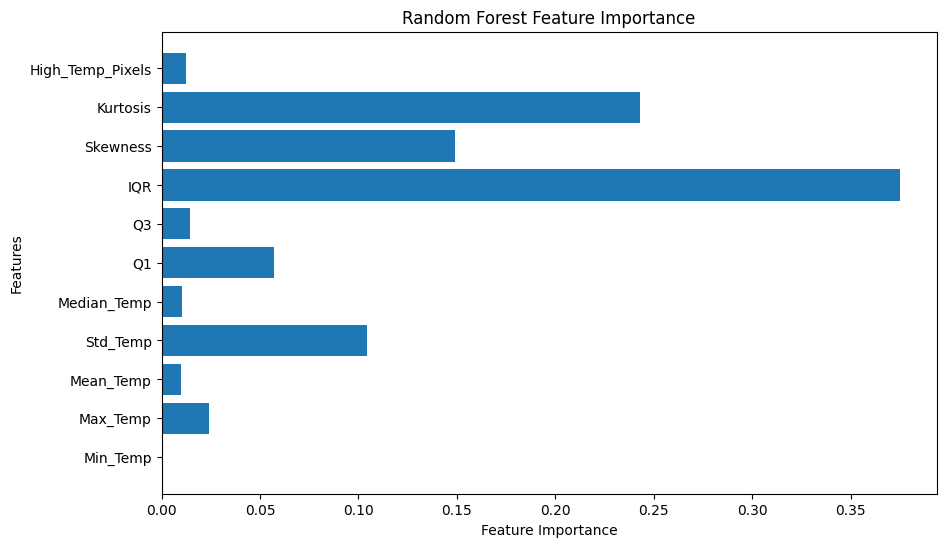

In [8]:
import matplotlib.pyplot as plt
feature_importance = xgb_classifier.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()
